In [17]:
import pandas as pd
import numpy as np

In [18]:
data=pd.read_csv('parkinsons_updrs.csv')

In [19]:
data

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,22.485,33.485,0.00406,0.000031,0.00167,0.00168,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.8400,21.988,32.988,0.00297,0.000025,0.00119,0.00147,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.8200,21.495,32.495,0.00349,0.000025,0.00152,0.00187,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.7300,21.007,32.007,0.00281,0.000020,0.00128,0.00151,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


In [20]:
Y  = data.loc[:,['subject#','test_time','total_UPDRS','motor_UPDRS']]
X = data.drop(columns=['total_UPDRS','motor_UPDRS'])

In [21]:
Y['day'] = Y['test_time'].apply(lambda x: int(x))
grouped_means = Y.groupby(['subject#', 'day']).agg({'total_UPDRS':'mean', 'motor_UPDRS':'mean'}).reset_index()
grouped_means.columns  = ['subject','day','total_UPDRS','motor_UPDRS']
grouped_means

,subject,day,total_UPDRS,motor_UPDRS
0,1,5,34.398333,28.199000
1,1,12,34.894000,28.447000
2,1,19,35.389167,28.695000
3,1,25,35.810500,28.905000
4,1,33,36.375000,29.187333
...,...,...,...,...
985,42,142,33.485000,22.485000
986,42,149,32.988000,21.988000
987,42,156,32.495167,21.495167
988,42,163,32.007000,21.007000


In [22]:
grouped_means.to_csv('Grouped_means.csv')

In [23]:
# First, sort the data by 'subject' and 'day' to ensure the order
data_sorted = grouped_means.sort_values(by=['subject', 'day'])

# Then, for each subject, assign week numbers starting from 1
data_sorted['week'] = data_sorted.groupby('subject')['day'].rank(method='dense').astype(int)
data_sorted.drop(columns = 'day',inplace=True)
data_sorted.head()

,subject,total_UPDRS,motor_UPDRS,week
0,1,34.398333,28.199000,1
1,1,34.894000,28.447000,2
2,1,35.389167,28.695000,3
3,1,35.810500,28.905000,4
4,1,36.375000,29.187333,5


In [24]:
mean_total_UPDRS

,week,total_UPDRS
0,1,26.597626
1,2,26.778966
2,3,26.967043
3,4,27.175160
4,5,27.376287
5,6,27.540841
6,7,27.725283
7,8,27.899364
8,9,28.021832
9,10,28.220055


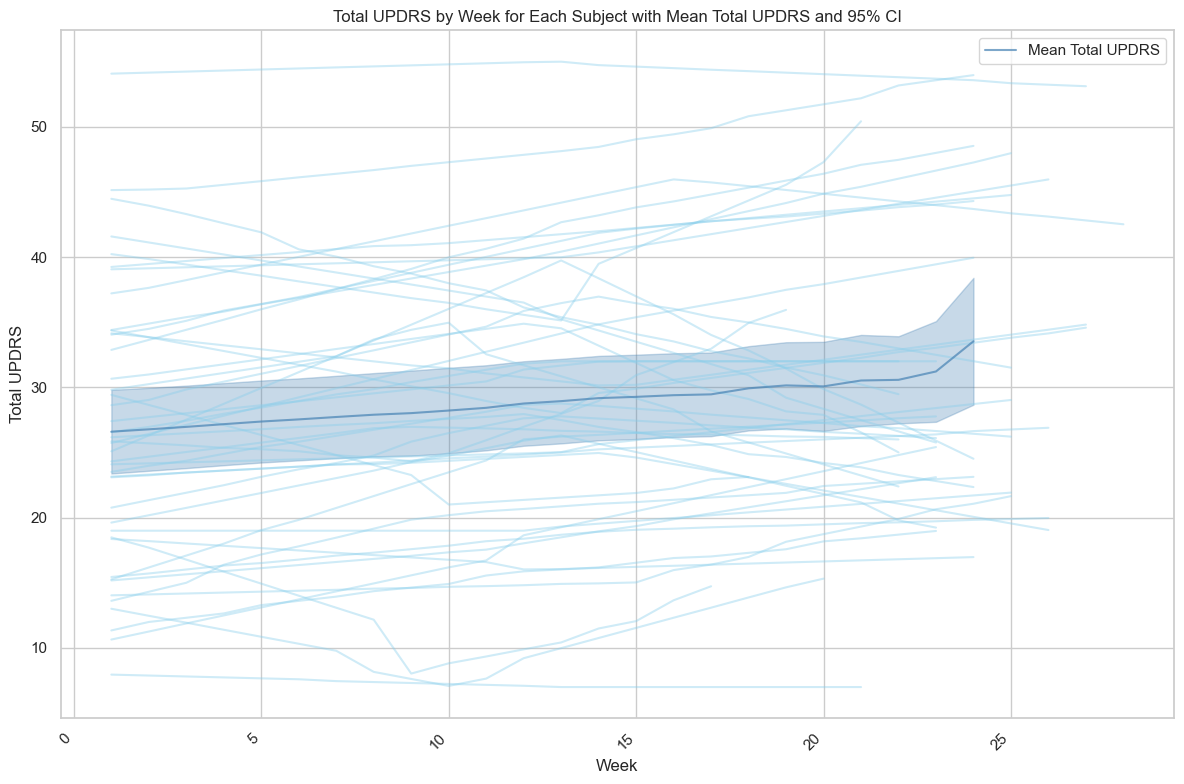

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate mean_total_UPDRS across weeks for all subjects
mean_total_UPDRS = data_sorted.groupby('week')['total_UPDRS'].mean().reset_index()
mean_total_UPDRS = mean_total_UPDRS[mean_total_UPDRS['week']<=24]
# Calculate the 95% confidence interval for mean_total_UPDRS across weeks
ci_upper = []
ci_lower = []
for week in mean_total_UPDRS['week']:
    week_data = data_sorted[data_sorted['week'] == week]['total_UPDRS']
    ci = 1.96 * week_data.std() / np.sqrt(len(week_data))
    ci_lower.append(mean_total_UPDRS[mean_total_UPDRS['week'] == week]['total_UPDRS'].values[0] - ci)
    ci_upper.append(mean_total_UPDRS[mean_total_UPDRS['week'] == week]['total_UPDRS'].values[0] + ci)

# Plotting
plt.figure(figsize=(12, 8))

# Plot each subject as a separate line
for subject in data_sorted['subject'].unique():
    subject_data = data_sorted[data_sorted['subject'] == subject]
    plt.plot(subject_data['week'], subject_data['total_UPDRS'], color='skyblue', alpha=0.4)

# Plot the mean_total_UPDRS with confidence interval
plt.plot(mean_total_UPDRS['week'], mean_total_UPDRS['total_UPDRS'], color='steelblue', alpha=0.7, label='Mean Total UPDRS')
plt.fill_between(mean_total_UPDRS['week'], ci_lower, ci_upper, color='steelblue', alpha=0.3)

# Beautify the plot
plt.xticks(rotation=45, ha="right")
plt.xlabel('Week')
plt.ylabel('Total UPDRS')
plt.title('Total UPDRS by Week for Each Subject with Mean Total UPDRS and 95% CI')
plt.legend()
plt.tight_layout()
plt.savefig('Mean Total UPDRS.png')
# Show the plot
plt.show()

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))

# Plot for each subject using a light blue color with an alpha value for transparency
for subject in subjects:
    subject_data = grouped_means[grouped_means['subject'] == subject]
    plt.plot(subject_data['day'], subject_data['total_UPDRS'], color='skyblue', alpha=0.4)

plt.plot(x_values, y_means, 'o-', color='steelblue', label='Mean Total UPDRS')
plt.fill_between(x_values, y_ci95_lo, y_ci95_hi, color='steelblue', alpha=0.2, label='95% Confidence Interval')

plt.title('Mean Total UPDRS Score by Day for Each Subject')
plt.xlabel('Day')
plt.ylabel('Mean Total UPDRS Score')
plt.savefig('Mean Total UPDRS.png')
# Remove the legend
plt.show()

NameError: name 'subjects' is not defined

<Figure size 1400x700 with 0 Axes>

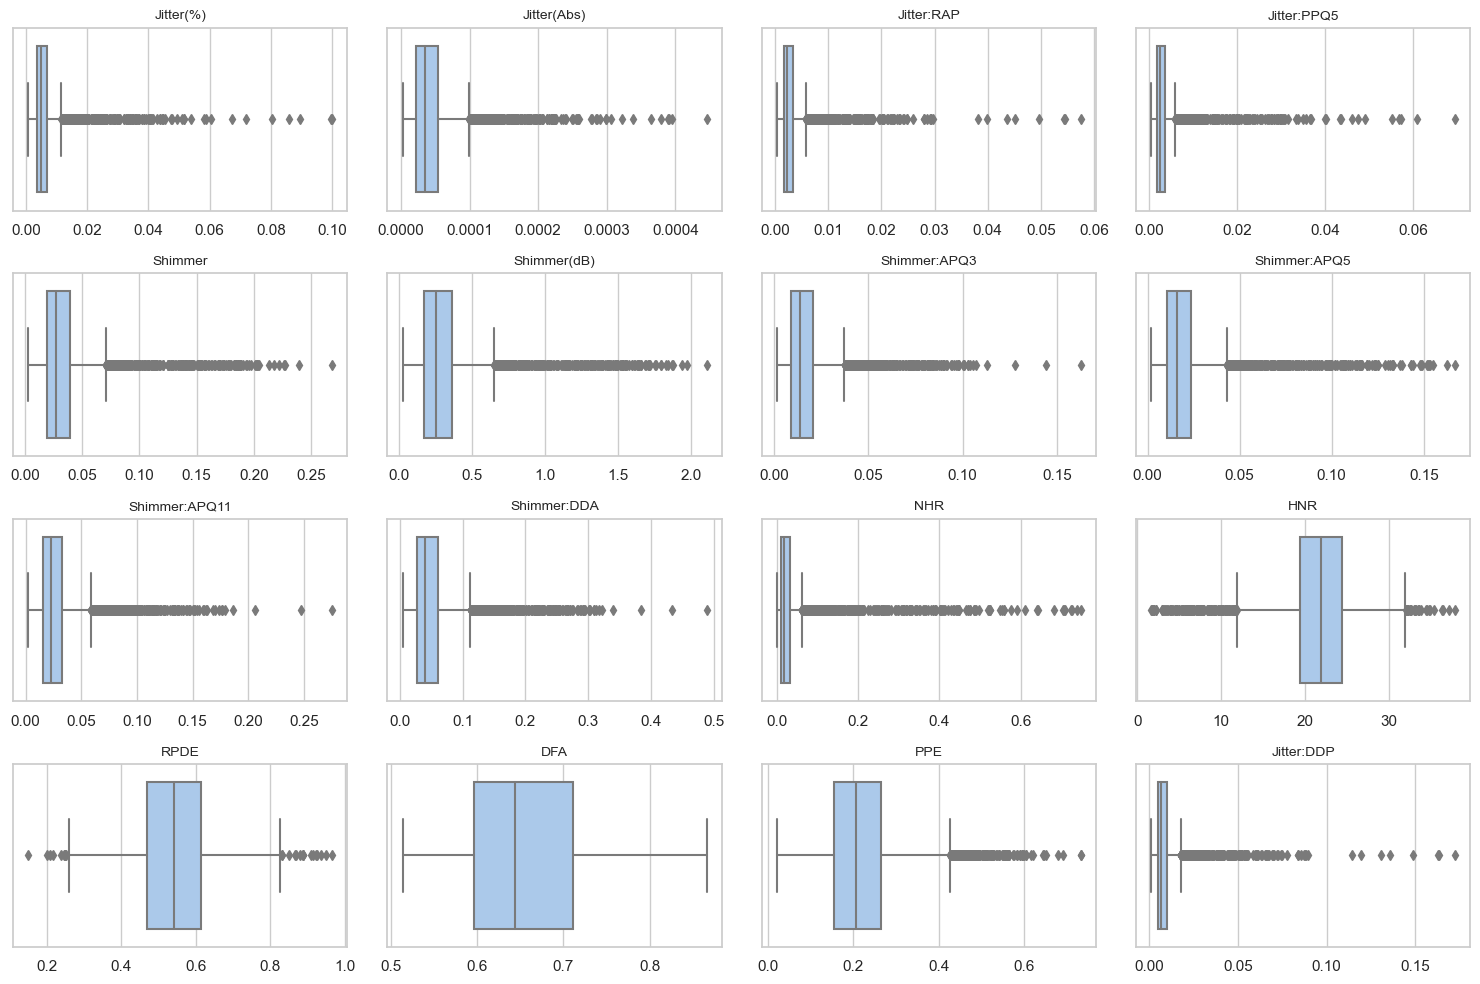

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of column names that we want to create boxplots for
features = ['Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 
            'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 
            'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE', 'Jitter:DDP']

# Setting up the matplotlib figure
sns.set(style="whitegrid", palette="pastel")
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Plotting boxplots for each feature
for i, ax in enumerate(axes.flatten()):
    if i < len(features):
        sns.boxplot(x=data[features[i]], ax=ax)
        ax.set_title(features[i], fontsize=10)
        ax.set_xlabel('')
    else:
        ax.axis('off')

plt.tight_layout()
plt.savefig('DS_1.png')
plt.show()


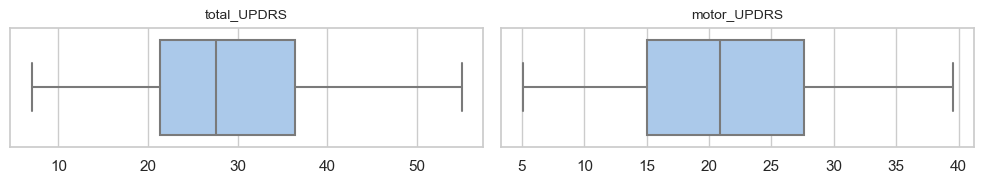

In [37]:
response=['total_UPDRS','motor_UPDRS']
# Setting up the matplotlib figure
sns.set(style="whitegrid", palette="pastel")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 2))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Plotting boxplots for each feature
for i, ax in enumerate(axes.flatten()):
    if i < len(response):
        sns.boxplot(x=data[response[i]], ax=ax)
        ax.set_title(response[i], fontsize=10)
        ax.set_xlabel('')
    else:
        ax.axis('off')

plt.tight_layout()
plt.savefig('DS_1.5.png')
plt.show()

In [ ]:
response=['total_UDPRS','motor_UDPRS']
# Setting up the matplotlib figure
sns.set(style="whitegrid", palette="pastel")
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Plotting boxplots for each feature
for i, ax in enumerate(axes.flatten()):
    if i < len(response):
        sns.boxplot(x=data[response[i]], ax=ax)
        ax.set_title(response[i], fontsize=10)
        ax.set_xlabel('')
    else:
        ax.axis('off')

plt.tight_layout()
plt.savefig('DS_1.png')
plt.show()

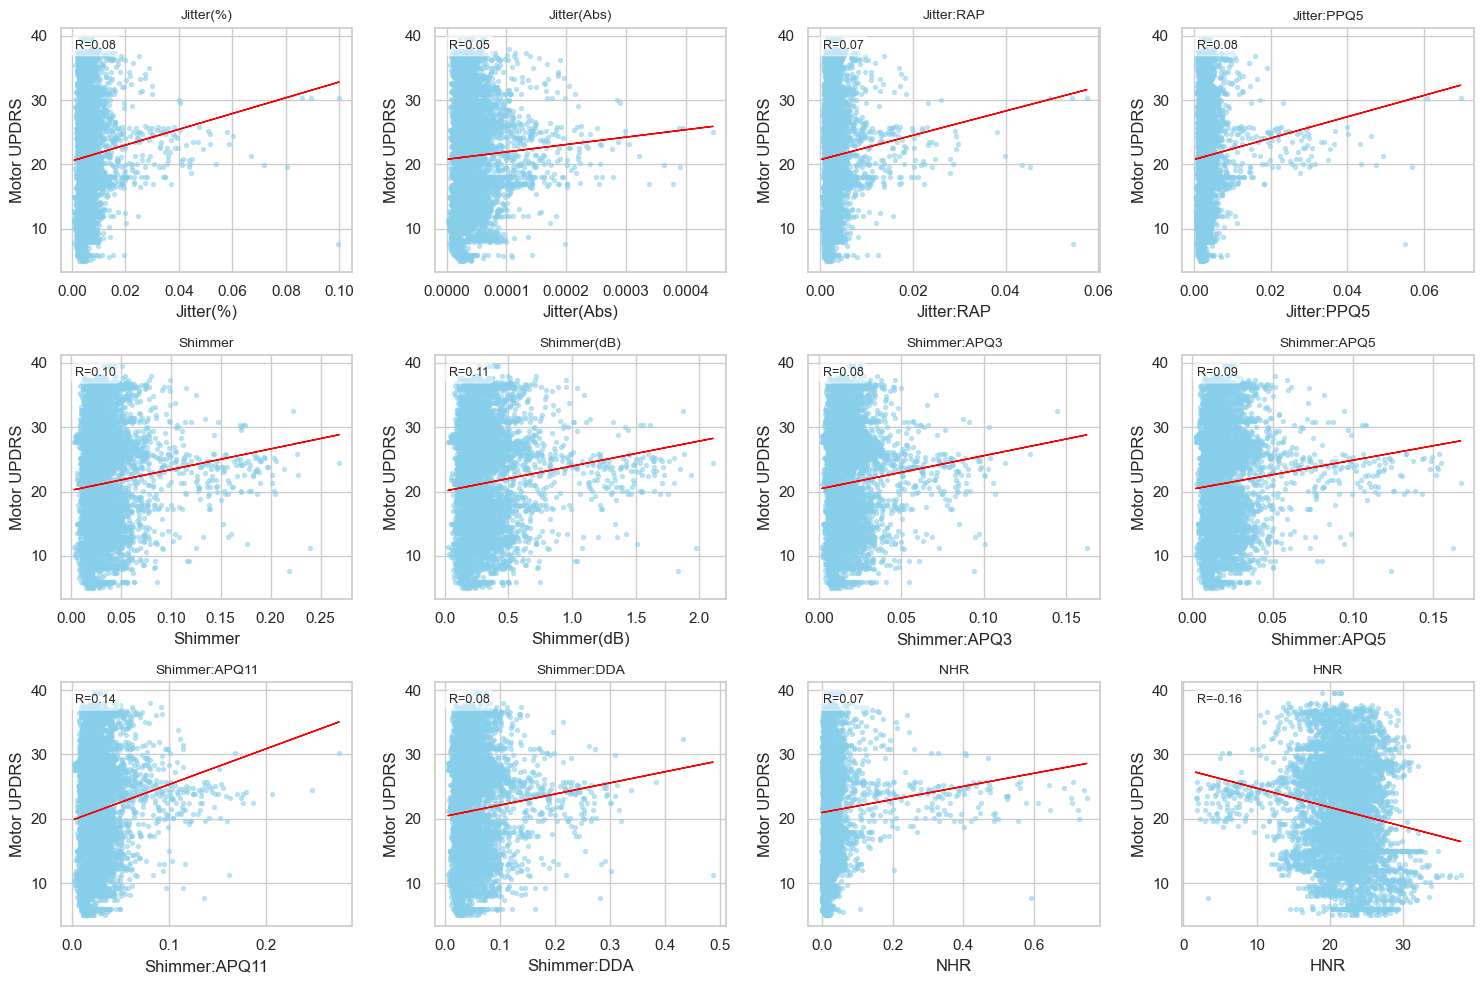

In [35]:
# We'll use numpy's polyfit to fit a line to the scatter plots and add it to the existing plot.

# Redefining the figure with the updated style
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
color = 'skyblue'

# Plotting scatter plots for each feature against motor_UPDRS with a fit line
for i, ax in enumerate(axes.flatten()):
    if i < len(features):
        x = data[features[i]]
        y = data['motor_UPDRS']
        
        # Scatter plot
        ax.scatter(x, y, alpha=0.5, c=color, s = 8 )
        
        # Fit line
        m, b = np.polyfit(x, y, 1)
        ax.plot(x, m*x + b, color="red", linewidth=1)
        
        # Set title and labels
        ax.set_title(f'{features[i]}', fontsize=10)
        ax.set_xlabel(f'{features[i]}')
        ax.set_ylabel('Motor UPDRS')
        
        # Calculating the correlation coefficient
        corr = np.corrcoef(x, y)[0, 1]
        ax.text(0.05, 0.95, f'R={corr:.2f}', transform=ax.transAxes, fontsize=9, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

    else:
        ax.axis('off')

plt.tight_layout()
plt.savefig('DS_2.png')                          
plt.show()

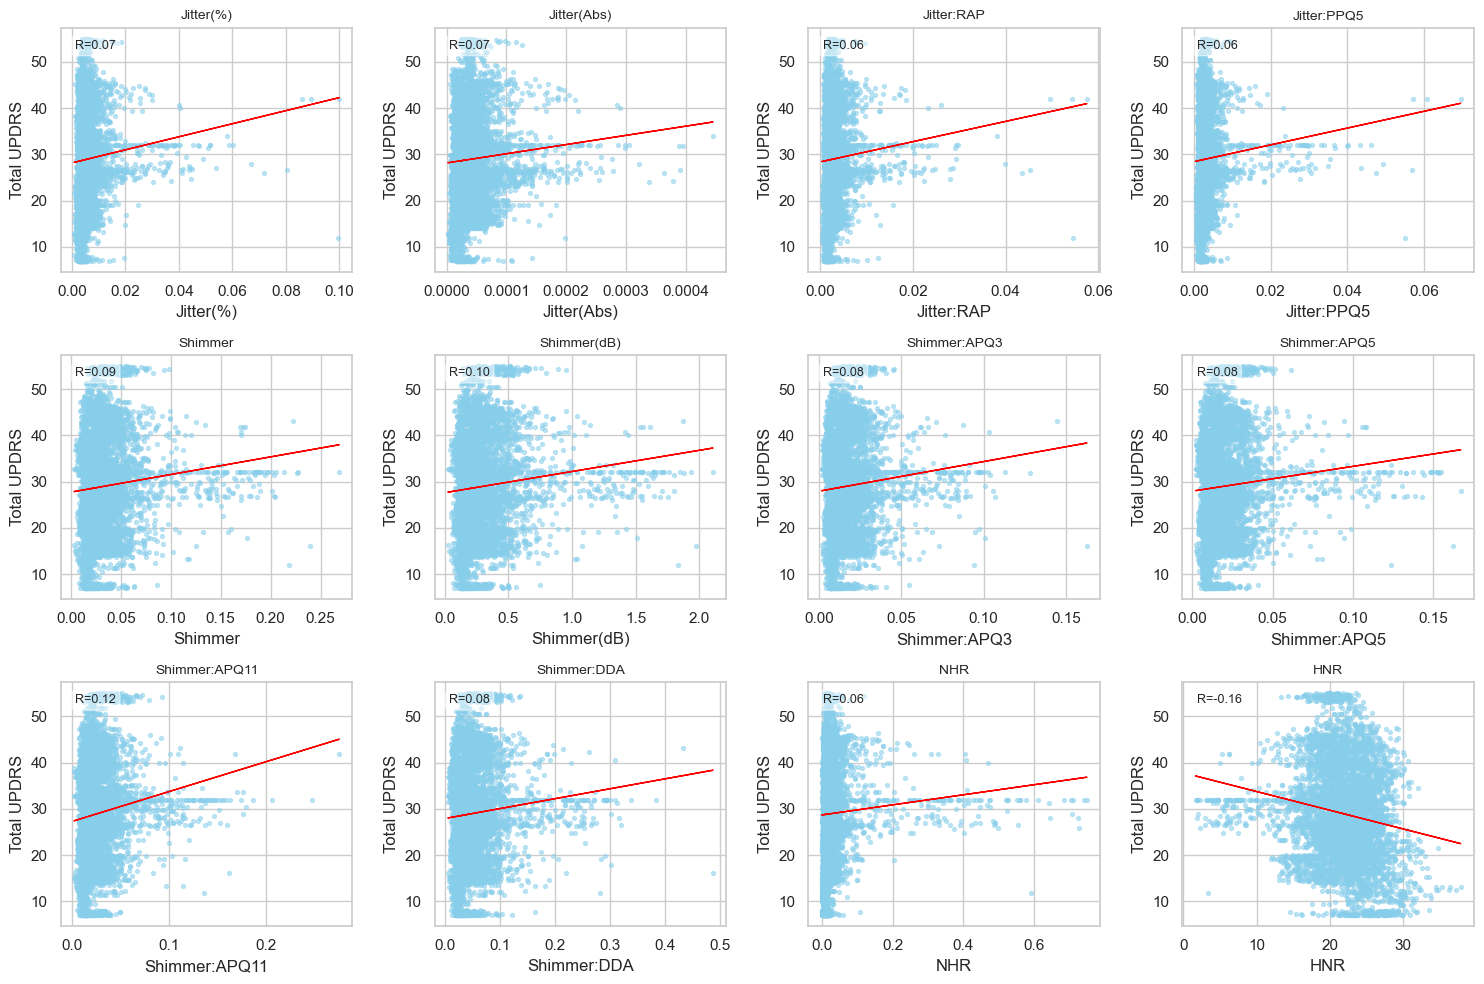

In [38]:
# Redefining the figure with the updated style
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
color = 'skyblue'

# Plotting scatter plots for each feature against total_UPDRS with a fit line
for i, ax in enumerate(axes.flatten()):
    if i < len(features):
        x = data[features[i]]
        y = data['total_UPDRS']
        
        # Scatter plot
        ax.scatter(x, y, alpha=0.5, c=color, s=8)
        
        # Fit line
        m, b = np.polyfit(x, y, 1)
        ax.plot(x, m*x + b, color="red", linewidth=1)
        
        # Set title and labels
        ax.set_title(f'{features[i]}', fontsize=10)
        ax.set_xlabel(f'{features[i]}')
        ax.set_ylabel('Total UPDRS')
        
        # Calculating the correlation coefficient
        corr = np.corrcoef(x, y)[0, 1]
        ax.text(0.05, 0.95, f'R={corr:.2f}', transform=ax.transAxes, fontsize=9, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

    else:
        ax.axis('off')

plt.tight_layout()
plt.savefig('DS_3.png')                          
plt.show()